In [25]:
# importing typical packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Import Libraries, read data, and explore data

In [26]:
df=pd.read_csv('Data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [28]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [29]:
# rename class to fraud so it it more clear
df = df.rename(columns={'Class': 'Fraud'})

In [30]:
# normalize data
col_names = df.columns
values = df.values
scaler = preprocessing.MinMaxScaler()
values_scaled = scaler.fit_transform(values)
df = pd.DataFrame(values_scaled, columns=col_names)

In [31]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.548717,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,...,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124,0.003439,0.001727
std,0.274828,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,...,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698,0.009736,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313681,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,...,0.557798,0.484730,0.663030,0.334454,0.560104,0.372036,0.415203,0.312049,0.000218,0.000000
50%,0.490138,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,...,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352,0.000856,0.000000
75%,0.806290,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,...,0.564484,0.534688,0.667626,0.441460,0.597593,0.464807,0.418191,0.314712,0.003004,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0


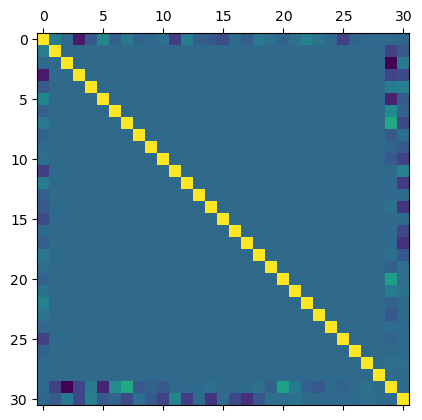

In [33]:
# plot grids to show correlation between features
plt.matshow(df.corr())

In [34]:
df.Fraud.value_counts(normalize=True)

0.0    0.998273
1.0    0.001727
Name: Fraud, dtype: float64

## Data Understanding and Correlations between features and targe

In [35]:
# plot grids to show correlation between features and target
#target variable is fraud
#features : V1-V28
z={}
for i in df :
    Y = df[i]
    X= df['Fraud']
    
    c=Y.corr(X)
    z[i]=c

z.pop('Fraud')
z.pop('Amount')
print (z)
v=z.values()
print(v)

{'Time': -0.012322570929245666, 'V1': -0.10134729859508522, 'V2': 0.09128865034461961, 'V3': -0.19296082706741421, 'V4': 0.13344748623900504, 'V5': -0.09497429899144849, 'V6': -0.04364316069996396, 'V7': -0.18725659151429844, 'V8': 0.019875123914794457, 'V9': -0.09773268607407921, 'V10': -0.2168829436410285, 'V11': 0.15487564474394763, 'V12': -0.2605929248772177, 'V13': -0.004569778799461276, 'V14': -0.30254369580440504, 'V15': -0.004223402267856689, 'V16': -0.19653894030401886, 'V17': -0.3264810672437151, 'V18': -0.11148525388904142, 'V19': 0.03478301303651491, 'V20': 0.020090324196975415, 'V21': 0.0404133806105757, 'V22': 0.0008053175052984554, 'V23': -0.0026851557402507035, 'V24': -0.0072209067159527355, 'V25': 0.0033077055972996604, 'V26': 0.004455397501283363, 'V27': 0.01757972818951329, 'V28': 0.009536040916236195}
dict_values([-0.012322570929245666, -0.10134729859508522, 0.09128865034461961, -0.19296082706741421, 0.13344748623900504, -0.09497429899144849, -0.04364316069996396, -

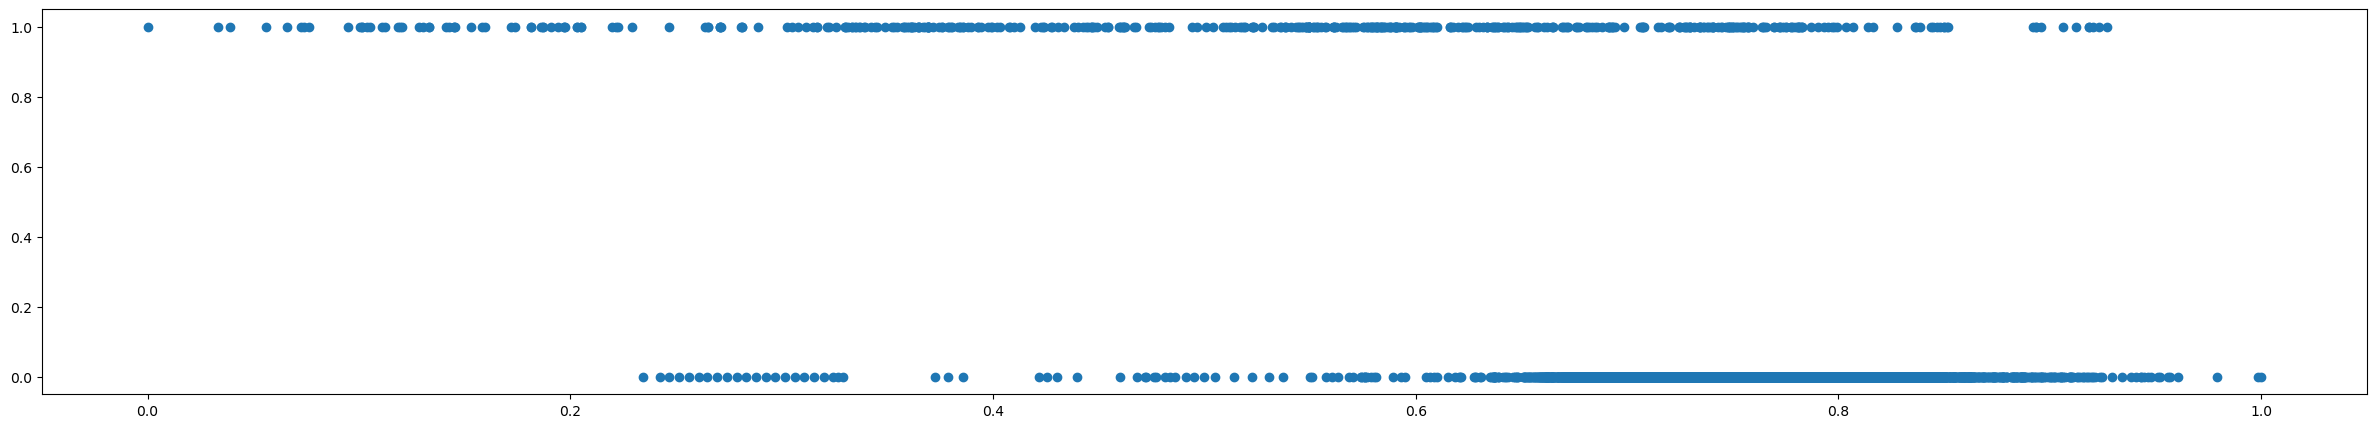

In [36]:
plt.figure(figsize=(30,5))
plt.scatter(df['V17'],df['Fraud'])

<Figure size 3000x3000 with 0 Axes>

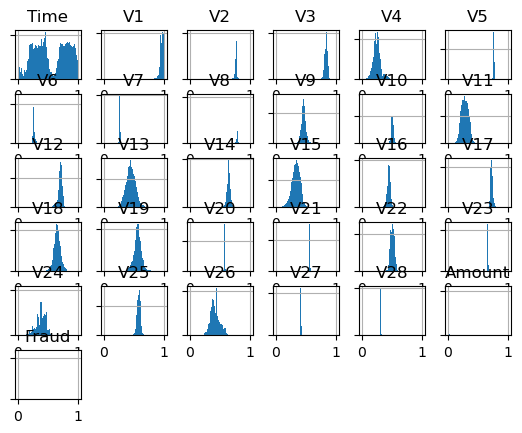

In [37]:
plt.figure(figsize=(30,30))
ax = df.hist(bins=100)
for ylabel in ax.flatten():
    ylabel.set_yticklabels([])
plt.show()

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
dtype: float64


<BarContainer object of 30 artists>

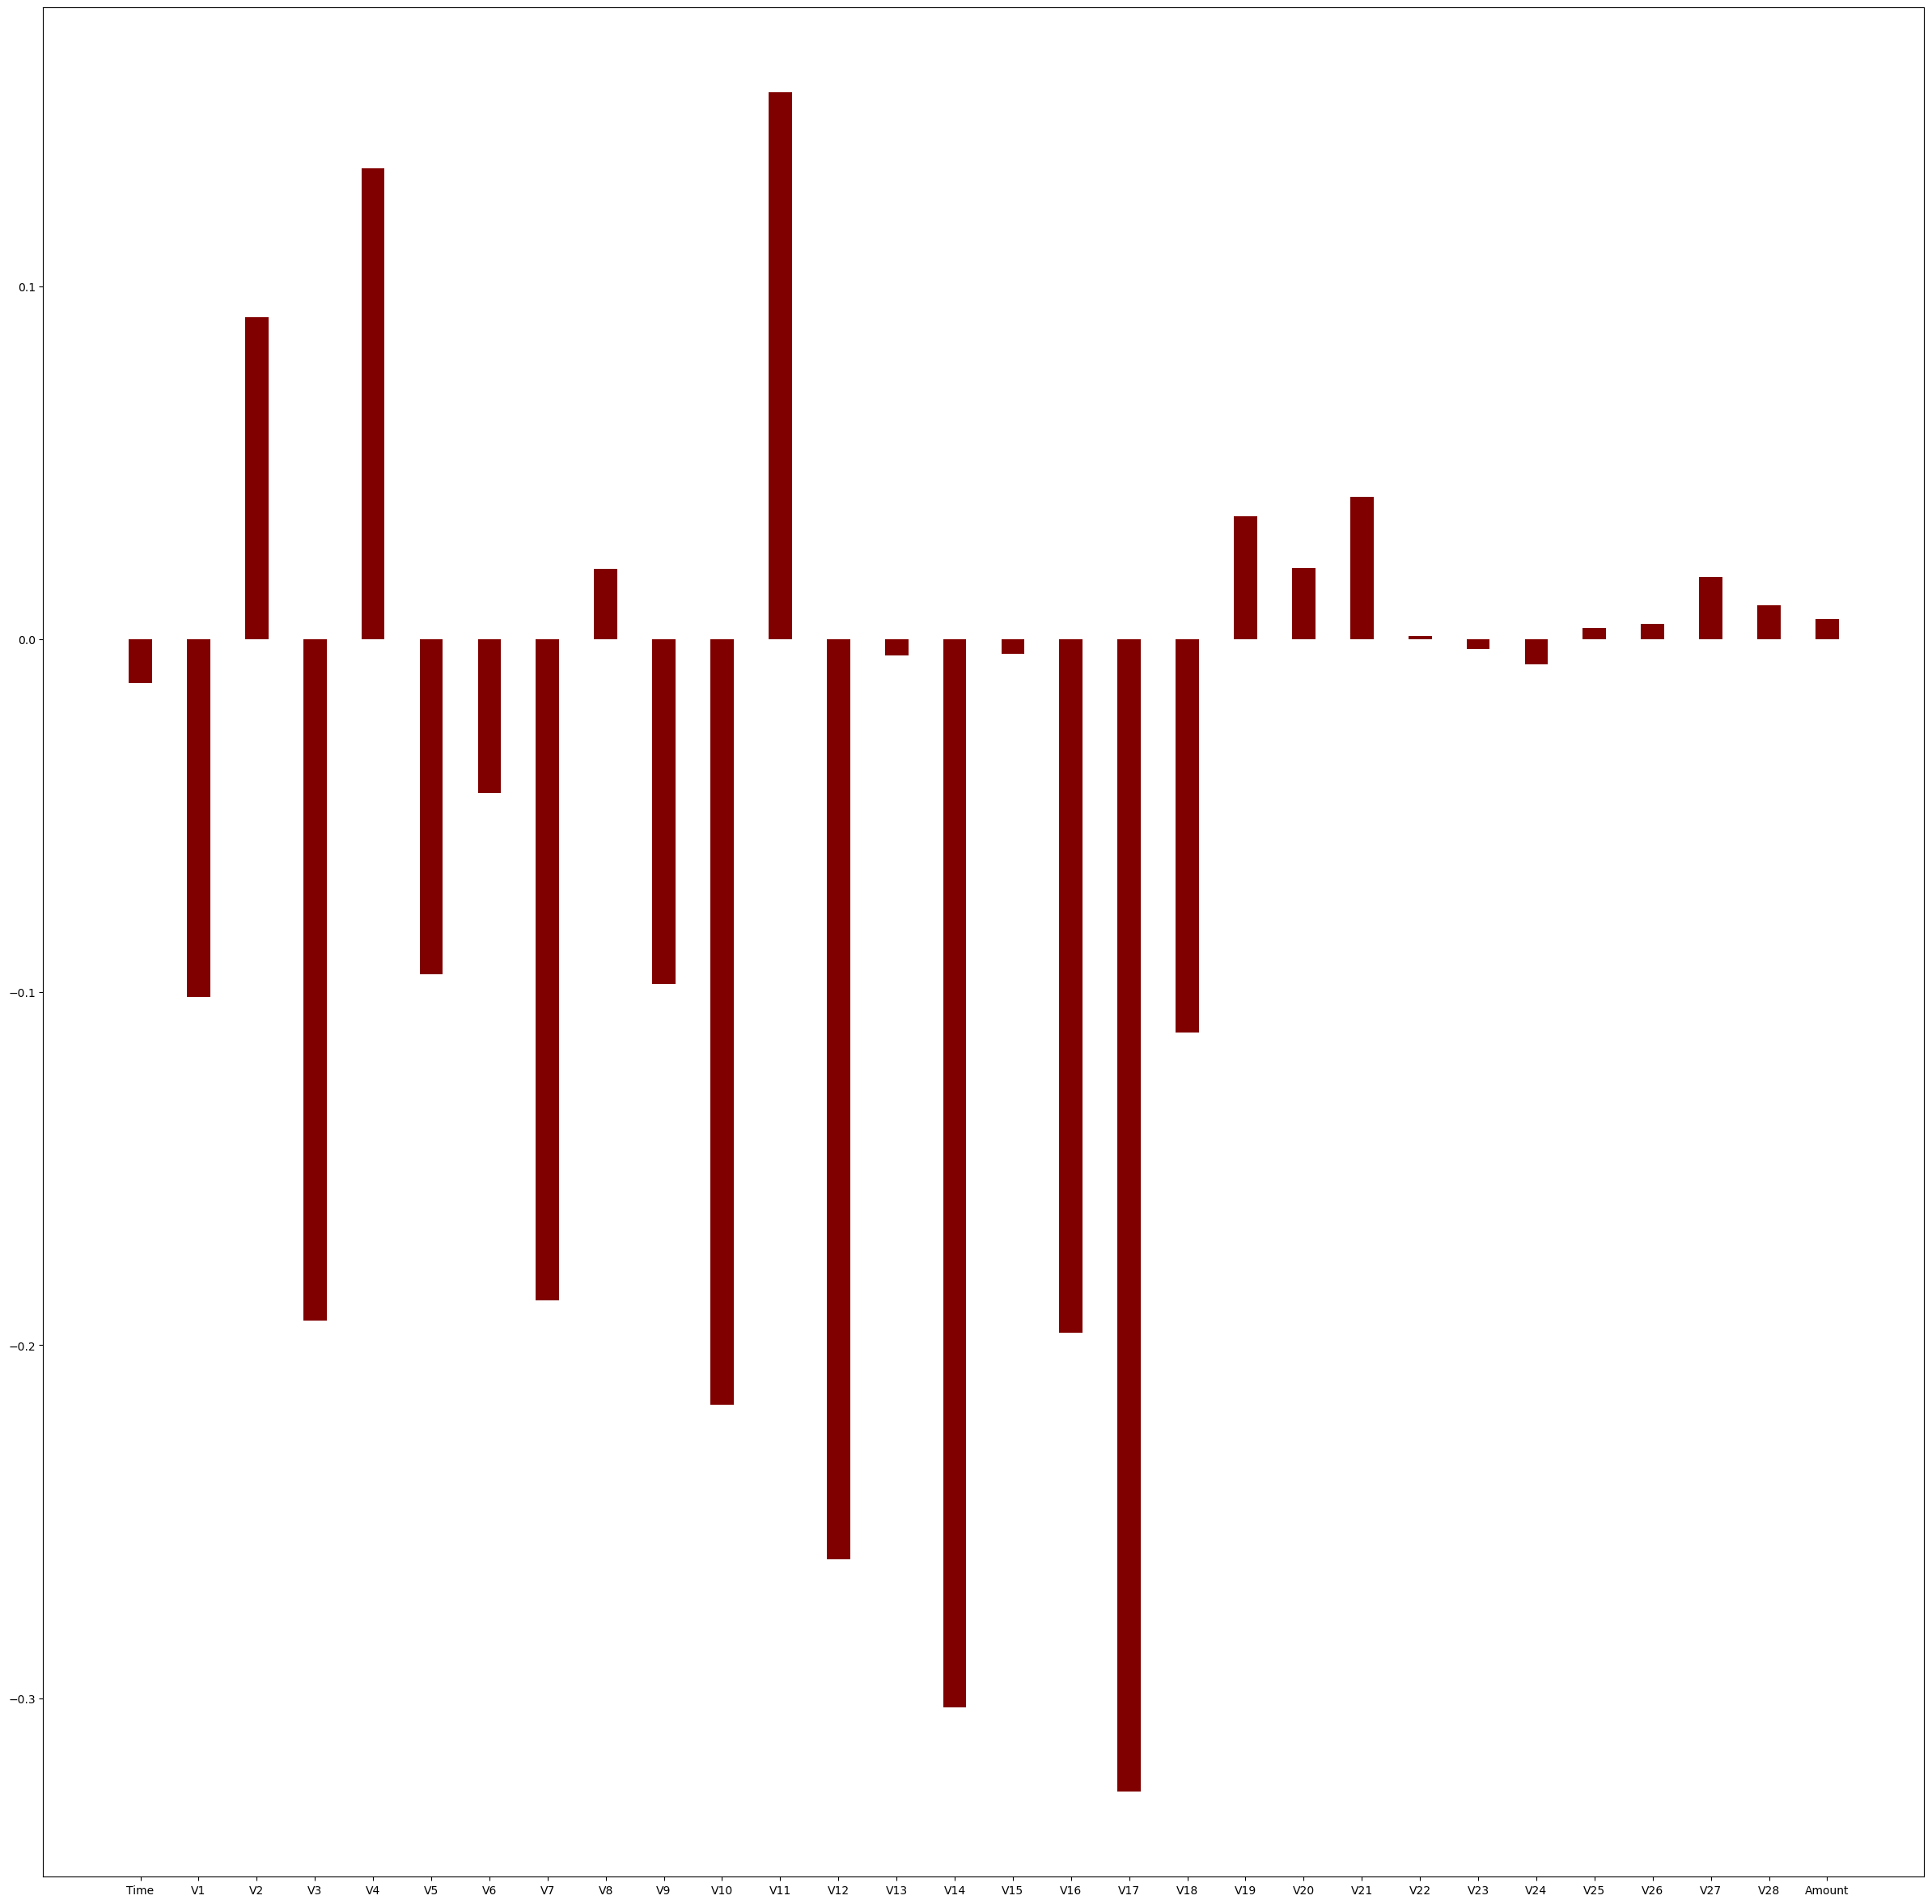

In [38]:
plt.figure(figsize=(30,30))
z=df['Fraud']
dfcorr=df.corrwith(z)
dfcorr=dfcorr.drop("Fraud")
print(dfcorr)
v=dfcorr.values
plt.bar(dfcorr.keys(), v, color ='maroon',width = 0.4)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V17', ylabel='Density'>

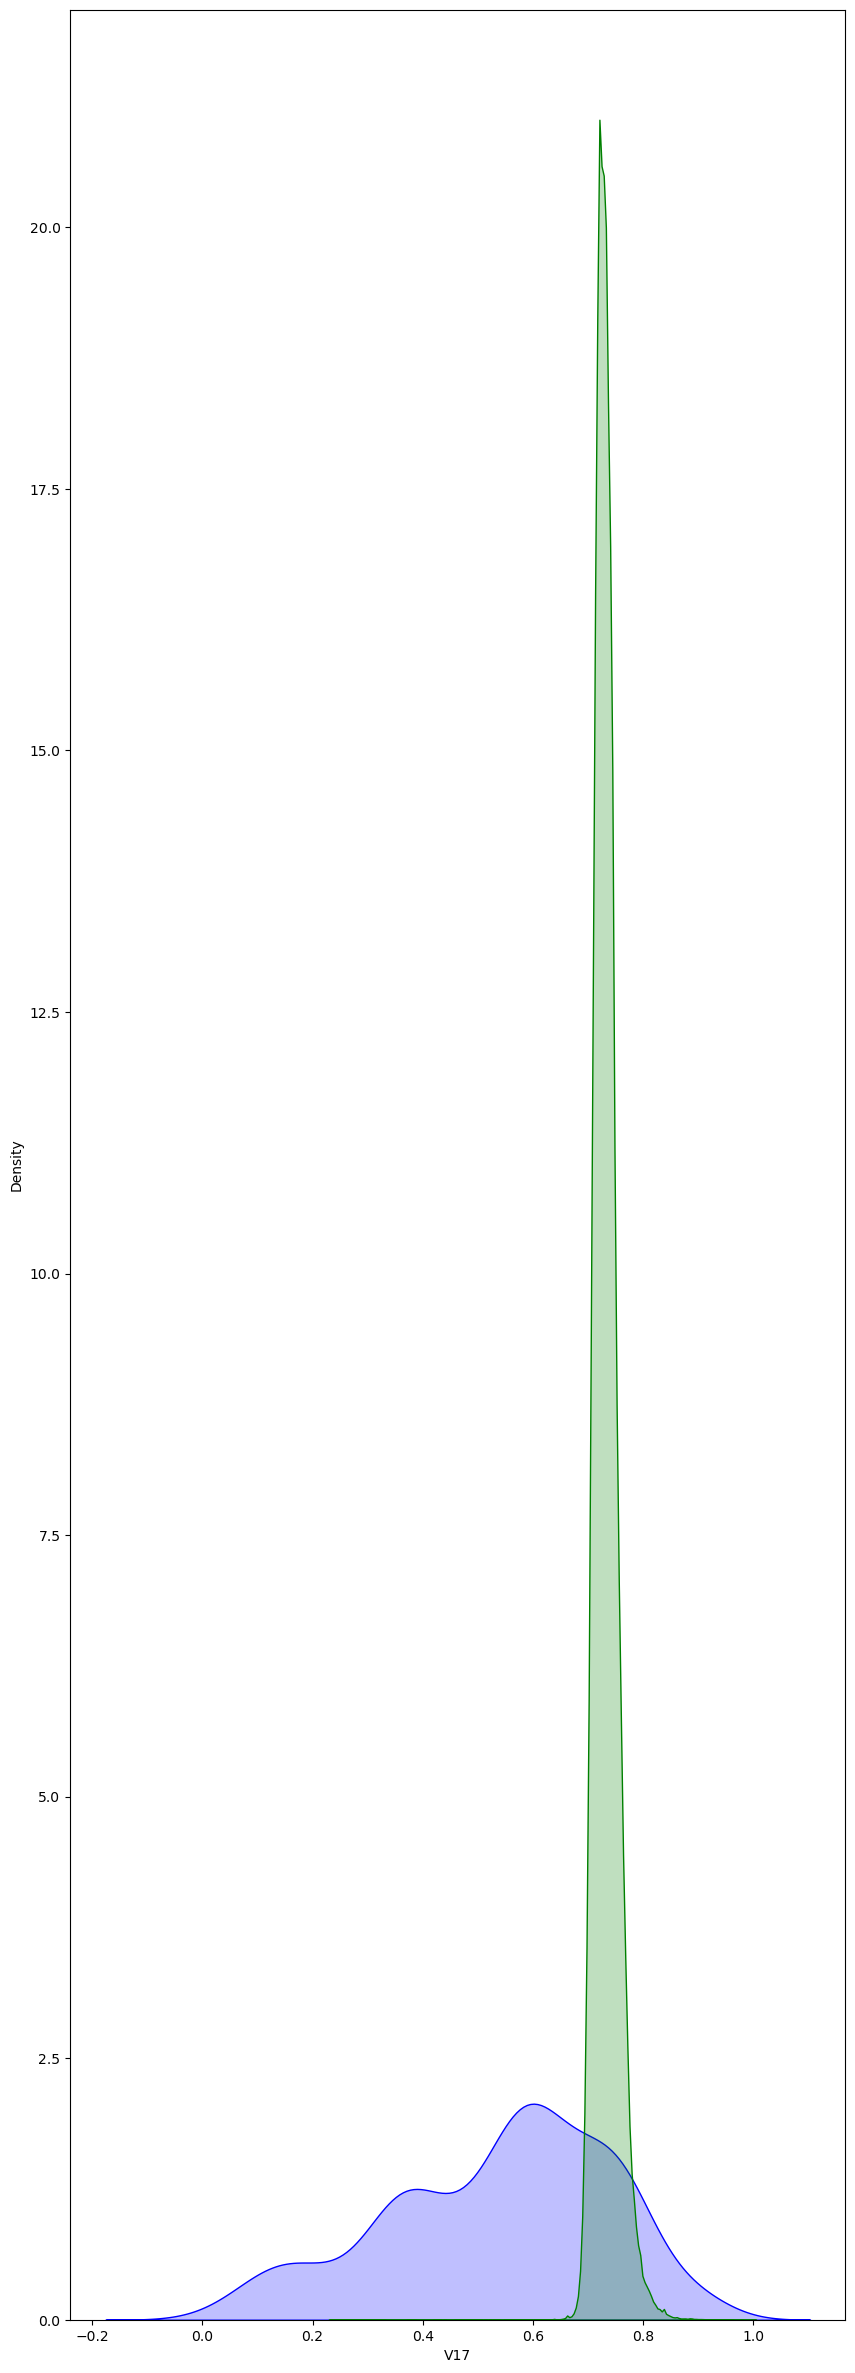

In [39]:
#distribution of most correlated and inversely correlated feature variables
plt.figure(figsize=(10,30))
v17=df['V17'].values
sns.distplot(df['V17'][df.Fraud==1], hist=False, color="b", kde_kws={"shade": True})
sns.distplot(df['V17'][df.Fraud==0], hist=False, color="g", kde_kws={"shade": True})

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V14', ylabel='Density'>

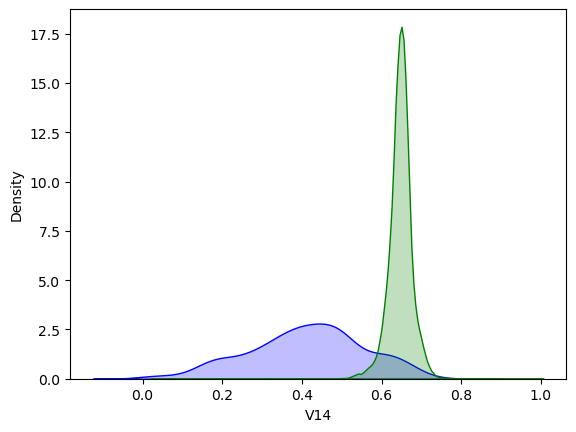

In [40]:
sns.distplot(df['V14'][df.Fraud==1], hist=False, color="b", kde_kws={"shade": True})
sns.distplot(df['V14'][df.Fraud==0], hist=False, color="g", kde_kws={"shade": True})

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V11', ylabel='Density'>

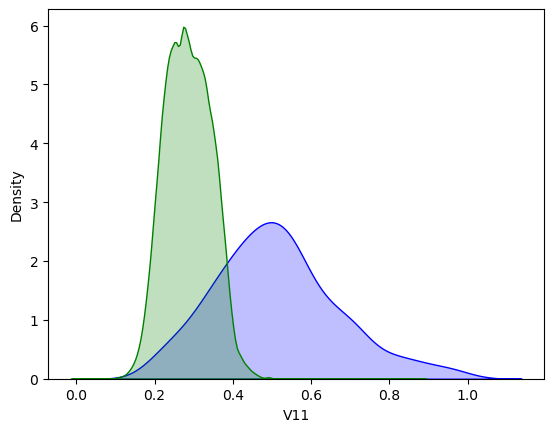

In [41]:
sns.distplot(df['V11'][df.Fraud==1], hist=False, color="b", kde_kws={"shade": True})
sns.distplot(df['V11'][df.Fraud==0], hist=False, color="g", kde_kws={"shade": True})

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='V4', ylabel='Density'>

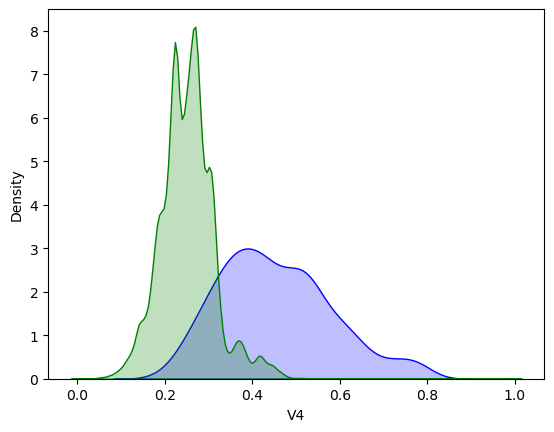

In [42]:
sns.distplot(df['V4'][df.Fraud==1], hist=False, color="b", kde_kws={"shade": True})
sns.distplot(df['V4'][df.Fraud==0], hist=False, color="g", kde_kws={"shade": True})

## Create baseline logistic regression

In [43]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [44]:
# Gets X and y given dataframe
def get_X_y(df):
    X = df.drop('Fraud', axis=1)
    y = df['Fraud']
    return X, y

In [45]:
# Given a dataframe, returns a logistic regression model, X_test split, and y_test split
def train_logistic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    return model, X_test, y_test

In [46]:
def print_metrics(y, predictions):
    print(f'Accuracy: {accuracy_score(y, predictions)}')
    print(f'Precision: {precision_score(y, predictions)}')
    print(f'Recall: {recall_score(y, predictions)}')
    print(f'F1 Score: {f1_score(y, predictions)}')

In [47]:
# given a logistic regression model, X_test split, and y_test split returns a confusion matrix
# and prints several metrics
def plot_confusion_matrix(model, X_test, y_test):
    test_predictions = model.predict(X_test)

    score = model.score(X_test, y_test)

    confusion_matrix = metrics.confusion_matrix(y_test, test_predictions)

    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    title = f'Accuracy Score: {score}'
    plt.title(title, size = 15);
    
    print('Test:')
    print_metrics(y_test, test_predictions)

Test:
Accuracy: 0.9989607033510295


NameError: name 'precision_score' is not defined

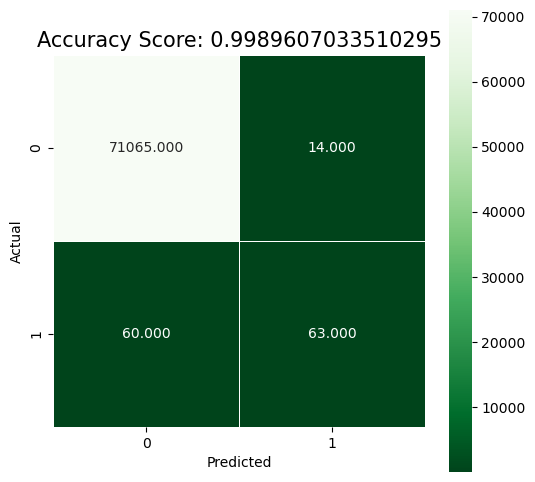

In [48]:
# basic logistic regression
X_base, y_base = get_X_y(df)
model_1, X_test_base, y_test_base = train_logistic_regression(X_base, y_base)
plot_confusion_matrix(model_1, X_test_base, y_test_base)

## Rerun model after addressing data imbalance

In [ ]:
# https://www.researchgate.net/publication/339986048_Methods_of_Handling_Unbalanced_Datasets_in_Credit_Card_Fraud_Detection
# SMOTE (Static or Dynamic)
# Oversampling
# Undersampling
# Hybrid

In [ ]:
# seperate transaction types to make sampling easier
fraud = df[df['Fraud'] == 1]
valid = df[df['Fraud'] == 0]
print(fraud.shape)
print(valid.shape)

(492, 31)
(284315, 31)


### Undersampling

In [ ]:
valid_sample = valid.sample(n=492)
undersampled_5050 = pd.concat([fraud, valid_sample], axis=0)

Test:
Accuracy: 0.9308943089430894


NameError: name 'precision_score' is not defined

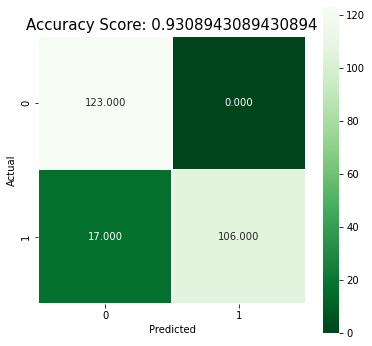

In [ ]:
# Logistic regression, undersampled to 1:1
X_under, y_under = get_X_y(undersampled_5050)
model_2, X_test_under, y_test_under = train_logistic_regression(X_under, y_under)
plot_confusion_matrix(model_2, X_test_under, y_test_under)

Test:
Accuracy: 0.9976545602651611


NameError: name 'precision_score' is not defined

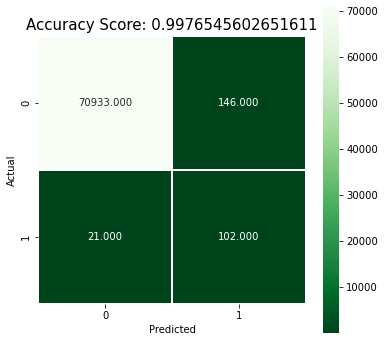

In [ ]:
# test undersampled model against unmodified base test data
plot_confusion_matrix(model_2, X_test_base, y_test_base)

### Oversample

In [ ]:
# This cell combines SMOTE oversampling of the minority class with undersampling of the majority class

oversample = SMOTE()
# synthetically upsample fraudulent cases to comprise 10% of dataset
over = SMOTE(sampling_strategy=0.1)
# random sampling to reduce majority class to 50% more than minority class
under = RandomUnderSampler(sampling_strategy=0.5)
smote_over_under = Pipeline([('over', over), ('under', under)])

In [ ]:
X_smote, y_smote = smote_over_under.fit_resample(X_base, y_base)

In [ ]:
X_smote

In [ ]:
y_smote.value_counts()

In [ ]:
# Logistic regression model trained with hybrid SMOTE and undersampling
model_3, X_test_smote, y_test_smote = train_logistic_regression(X_smote, y_smote)
plot_confusion_matrix(model_3, X_test_smote, y_test_smote)

In [ ]:
# test undersampled model against unmodified base test data
plot_confusion_matrix(model_3, X_test_base, y_test_base)

### SMOTE again but with less oversampling and more undersampling

In [ ]:
# This cell combines SMOTE oversampling of the minority class with undersampling of the majority class

oversample = SMOTE()
# synthetically upsample fraudulent cases 
over = SMOTE(sampling_strategy=0.005) # original proportion .0017
# random sampling to reduce majority class
under = RandomUnderSampler(sampling_strategy=0.5)
smote_over_under = Pipeline([('over', over), ('under', under)])

X_smote_under, y_smote_under = smote_over_under.fit_resample(X_base, y_base)

In [ ]:
# Logistic regression model trained with hybrid SMOTE and undersampling
model_4, X_test_smote_under, y_test_smote_under = train_logistic_regression(X_smote_under, y_smote_under)
plot_confusion_matrix(model_4, X_test_smote_under, y_test_smote_under)

In [ ]:
# test undersampled model against unmodified base test data
plot_confusion_matrix(model_4, X_test_base, y_test_base)

## Other models Decision tree and random fores

In [ ]:
#create target variable and drop fraud
target=df['Fraud']
dfFraud=df.drop("Fraud",axis=1)

In [ ]:
data=pd.get_dummies(dfFraud)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


In [ ]:
data_train,data_test,target_train,target_test=train_test_split(data,target,test_size=0.5,random_state=100)

In [ ]:
tree_clf=DecisionTreeClassifier(criterion='gini',max_depth=10)
tree_clf.fit(data_train,target_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
tree_clf.feature_importances_

array([0.0114134 , 0.0055069 , 0.        , 0.        , 0.00107452,
       0.02372566, 0.01022234, 0.00490054, 0.        , 0.        ,
       0.02647942, 0.        , 0.06606006, 0.00447109, 0.10516108,
       0.00597991, 0.00454473, 0.65323406, 0.00315606, 0.00348398,
       0.        , 0.00459112, 0.        , 0.00954709, 0.00433959,
       0.        , 0.0372033 , 0.01270719, 0.00219797, 0.        ])

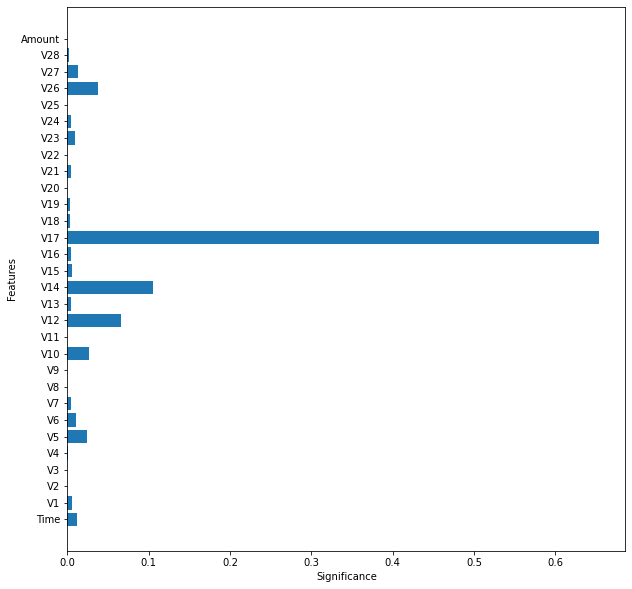

In [ ]:
def plot_feature_importances(model):
    features = data_train.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(range(features), model.feature_importances_, align='center')     
    plt.yticks(np.arange(features), data_train.columns.values) 
    plt.xlabel('Significance')
    plt.ylabel('Features')
plot_feature_importances(tree_clf)

In [ ]:
pred = tree_clf.predict(data_test) 
print(classification_report(target_test, pred))
print(confusion_matrix(target_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    142153
         1.0       0.78      0.75      0.76       251

    accuracy                           1.00    142404
   macro avg       0.89      0.87      0.88    142404
weighted avg       1.00      1.00      1.00    142404

[[142101     52]
 [    64    187]]


In [ ]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}".format(accuracy_score(target_test, pred) ))

Testing Accuracy for Decision Tree Classifier: 0.9992


In [ ]:
forest =RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

In [ ]:
forest.score(data_train, target_train)

0.9995786605619263

In [ ]:
forest.score(data_test, target_test)

0.9993539507317211

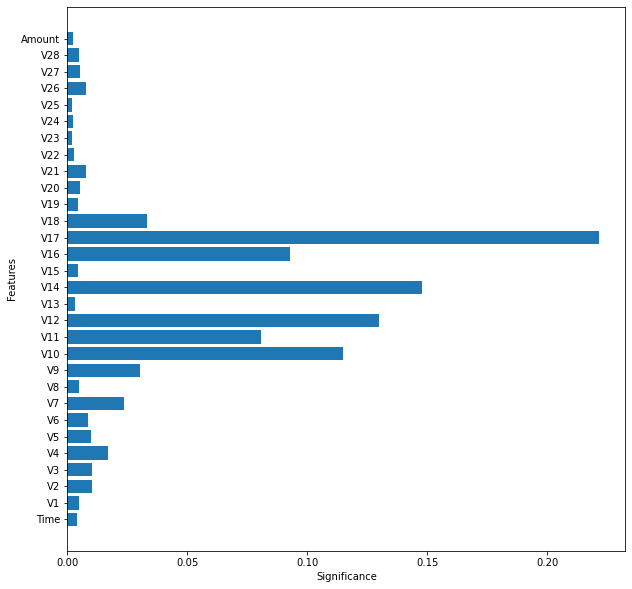

In [52]:
plot_feature_importances(forest)